In [2]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

In [3]:
y_true = np.array(['class1', 'yet', 'other'])
y_predict = np.array([[0.1],[0.7],[0.5]])
log_loss(y_true, y_predict, labels=['class1', 'other'])

0.26616923207259052

In [4]:
y_true = np.array(['yet', 'class1', 'other'])
y_predict = np.array([[0.1],[0.7],[0.5]])
log_loss(y_true, y_predict, labels=['class1', 'what'])

0.4013242681086453

In [5]:
y_true = np.array(['yet', 'class1', 'other'])
y_predict = np.array([[0.1],[0.7],[0.5]])
log_loss(y_true, y_predict, labels=['class1', 'other'])

0.6323733282952938

In [6]:
y_true = np.array(['yet', 'class1', 'other'])
y_predict = np.array([[0.1],[0.7],[0.5]])
log_loss(y_true, y_predict, labels=['class1', 'yet'])

1.1688526324399937

In [7]:
y_true = np.array(['yet', 'class1', 'other'])
y_predict = np.array([[0.1],[0.7],[0.5]])
log_loss(y_true, y_predict, labels=['yet', 'what'])

0.76752836433134852

In [8]:
y_true = np.array(['yet', 'class1', 'other'])
y_predict = np.array([[0.1, 0.8, 0.1],[0.7, 0.2, 0.1],[0.3, 0.4, 0.3]])
log_loss(y_true, y_predict, labels=None)

1.1918502562689777

In [9]:
y_true = np.array(['yet'])
y_predict = np.array([[0.9]])#[0.1, 0.8, 0.1])#,[0.7, 0.2, 0.1],[0.3, 0.4, 0.3]])
log_loss(y_true, y_predict, labels=['a', 'b'])

2.3025850929940459

In [10]:
y_true = np.array(['yet'])
y_predict = np.array([[0.9]])
log_loss(['yet'], [[0.9]], labels=['a', 'b'])

2.3025850929940459

In [11]:
log_loss(['EAP', 'other', 'yet'], [[0.99587364835336278], [0.0039347144572666644], [0.00019163718937051345]], labels=['EAP', 'b'])

1.8301205469853856

In [12]:
y_true = np.array(['wet', 'jet',])
y_predict = np.array([[0.9], [0.0001]])#[0.1, 0.8, 0.1])#,[0.7, 0.2, 0.1],[0.3, 0.4, 0.3]])
print(log_loss(y_true, y_predict, labels=['a', 'b']))
print(log_loss(y_true, y_predict, labels=['wet', 'b']))
print(log_loss(y_true, y_predict, labels=['b', 'wet']))
print(log_loss(y_true, y_predict, labels=['jet', 'b']))
print(log_loss(y_true, y_predict, labels=['b', 'jet']))

1.151342549
0.0527302603291
0.0527302603291
5.75646273249
5.75646273249


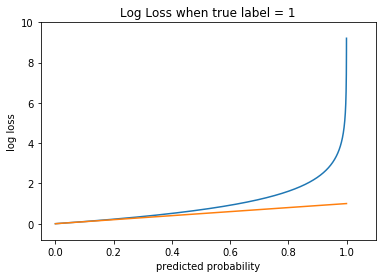

In [18]:
x = [i*.0001 for i in range(1,10000)]
y = [ log_loss(y_true=[1],
               y_pred=[[i*.0001,1-(i*.0001)]],
               eps=1e-15, # how close to get to undefined p=0 and p=1
               labels=[1,0])
     for i in range(1,10000,1) ]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.plot(x, x)

plt.show()

In [19]:
print(x[:10], x[-10:])

[0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.001] [0.999, 0.9991000000000001, 0.9992000000000001, 0.9993000000000001, 0.9994000000000001, 0.9995, 0.9996, 0.9997, 0.9998, 0.9999]


Оценяваме "убедеността" на **predict vs true**. На функцията се подава **true** стойност - в случая е **1**, но нека за обяснението ползваме клас **А**. Съсщо се подаваа и "убедеността" за това дали **predict** класа е **А**, под формата на списък с "увереностти". В конкретния случай има само два класа - **А** и **не А**. Движението по Х към 1 е еквивалентно на повишаване на "увереността" че подадения пример е **А**

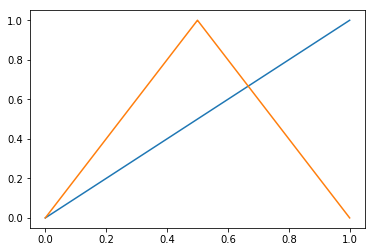

In [16]:
x = [ i*.0001 for i in range(1,10000) ]
tmp = [ i*.0002 for i in range(1,5000) ] + [ i*.0002 for i in range(5000,0,-1) ] 
# print(len(x),len(tmp))
# tmp[-2:]
plt.plot(x, x)
plt.plot(x, tmp)
plt.show()

In [63]:
tmp_y = np.array(list(zip(x,tmp)))

In [85]:
tmp_y[5000]

array([ 0.5001,  0.9998])

In [99]:
# x = [ i*.0001 for i in range(1,10000) ]

ll = [ log_loss(y_true=[1],
               y_pred=[i],
               eps=1e-15, # how close to get to undefined p=0 and p=1
               labels=[1,0])
     for i in tmp_y ]

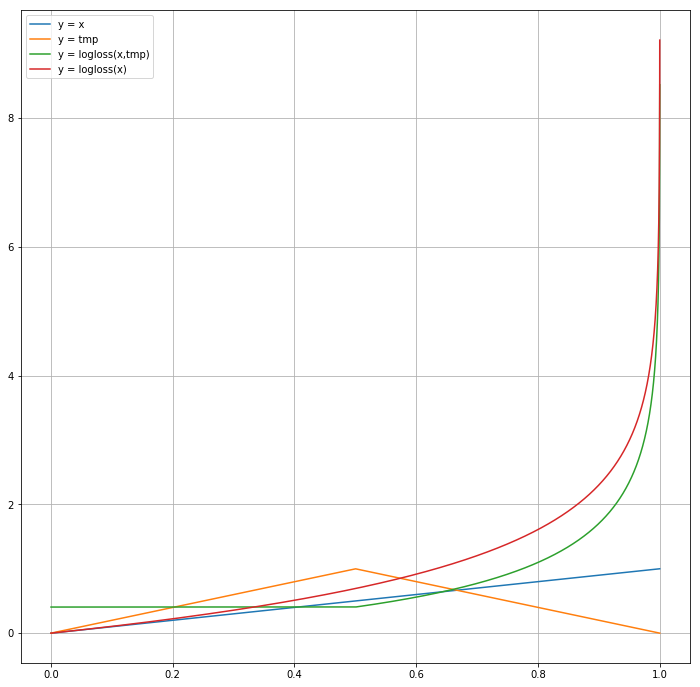

In [84]:
plt.figure(figsize=(12,12))
plt.plot(x, x)
plt.plot(x, tmp)
plt.plot(x, ll)
plt.plot(x, y)
plt.grid(True)
plt.legend(['y = x', 'y = tmp', 'y = logloss(x,tmp)', 'y = logloss(x)'], loc='upper left')

plt.show()

Увереността за *logloss(x,tmp)* е комбинация от уверенотстта в **True** класа - в случая *x*, и уверенотстта за **False** класа - в случая *tmp*. Тъй като увереността за *tmp*(**False**) расте по-бързо от тази за *x*(**True**), графиката за *logloss* от двата класа (в зелено) изостава от *logloss* от един клас. След минаването на x=0.5, увереността в *tmp*(**False**) започва да намалява, и цялостното разпределение не увереността в двата класа се доближава до представянето чрез един клас. Затова зелената графика настига червената.

На следващата графика ще ползвам един клас, представен чрез *tmp*, но този път това ще представя **True** класа.

In [89]:
tmp[4998:5002]

[0.9998, 1.0, 0.9998, 0.9996]

In [91]:
tmp[4999] = 0.999999

In [97]:
lt = [ log_loss(y_true=[1],
               y_pred=[i],
               eps=1e-15, # how close to get to undefined p=0 and p=1
               labels=[1,0])
     for i in tmp ]

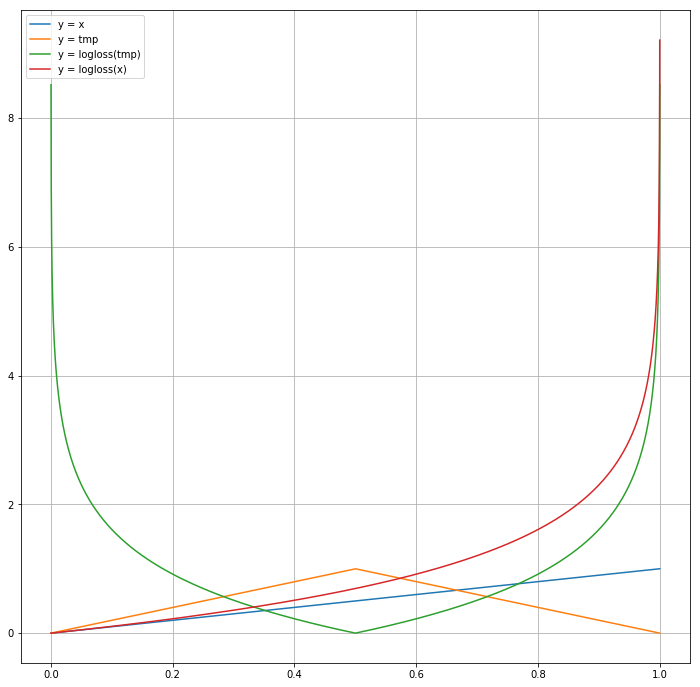

In [93]:
plt.figure(figsize=(12,12))
plt.plot(x, x)
plt.plot(x, tmp)
plt.plot(x, lt)
plt.plot(x, y)
plt.grid(True)
plt.legend(['y = x', 'y = tmp', 'y = logloss(tmp)',
            'y = logloss(x)'], loc='upper left')

plt.show()

In [94]:
lt2 = [ log_loss(y_true=[1],
               y_pred=[[i, 1-i]],
               eps=1e-15, # how close to get to undefined p=0 and p=1
               labels=[1,0])
     for i in tmp ]

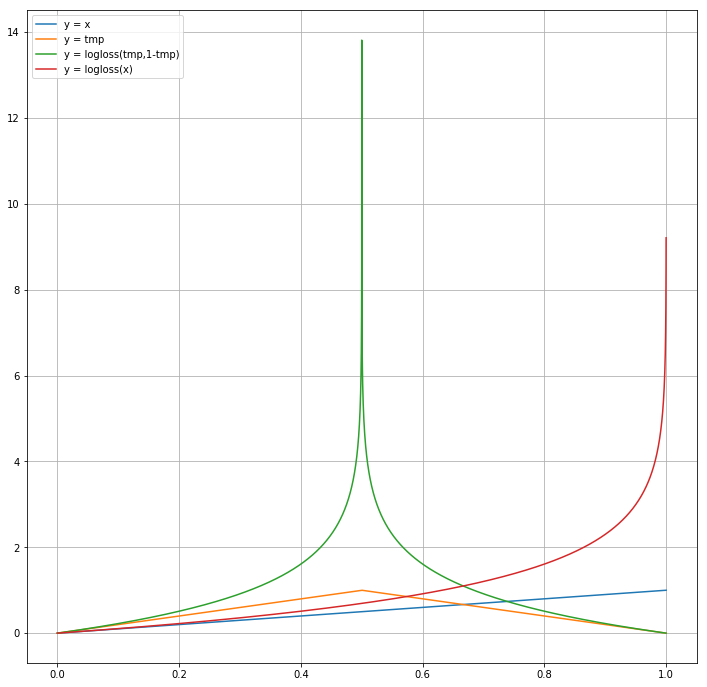

In [111]:
plt.figure(figsize=(12,12))
plt.plot(x, x)
plt.plot(x, tmp)
plt.plot(x, lt2)
plt.plot(x, y)
plt.grid(True)
plt.legend(['y = x', 'y = tmp', 'y = logloss(tmp,1-tmp)',
            'y = logloss(x)'], loc='upper left')

plt.show()

ОК, разликата между последните две графики е че при първата за *y_pred* подаваме само [[0.6]], а при втората [[0.6, 0.4]]. Това предполага че при един клас, по подразбиране *y_pred* е **False** вероятност. Какво значи това за резултата при подаване на 2 от общо 3 класа?

In [105]:
tmp_y[4999]

array([ 0.5,  1. ])

In [114]:
c3y = [ [z[0], z[1]/3, 1 - z[0] - z[1]/3] for z in tmp_y ]
c3y[4998:5002]

[[0.49990000000000001, 0.33326666666666666, 0.16683333333333333],
 [0.5, 0.33333333333333331, 0.16666666666666669],
 [0.50009999999999999, 0.33326666666666666, 0.16663333333333336],
 [0.50019999999999998, 0.3332, 0.16660000000000003]]

In [115]:
ll2 = [ log_loss(y_true=[1],
               y_pred=[i],
               eps=1e-15, # how close to get to undefined p=0 and p=1
               labels=[1, 0, 3])
     for i in c3y ]

НБ: на следващите графики да добавя линия за "3ти" калс = 1 - клас1 -клас2 (без да я слагам в изчислението на logloss, само в графиката)

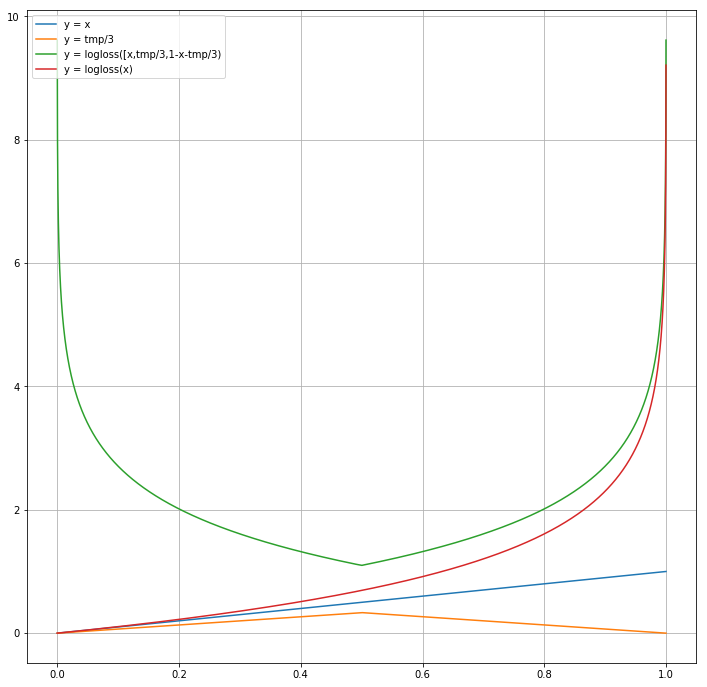

In [122]:
plt.figure(figsize=(12,12))
plt.plot(x, x)
plt.plot(x, [z/3 for z in tmp])
plt.plot(x, ll2)
plt.plot(x, y)
plt.grid(True)
plt.legend(['y = x', 'y = tmp/3', 'y = logloss([x,tmp/3,1-x-tmp/3)',
            'y = logloss(x)'], loc='upper left')

plt.show()

Понеже, в началото стойностите на първите два класа са ниски, имаме висока увереност че предсказваме третия клас. В средата ... 

Мммм, десния клон е еквивалентен на уверенсостта на **True** класа да е над 0.5.  Левия клон е над 0.5 увереност за клас който не е **True**.

In [121]:
c3yv2 = [ [z[0], z[1]/3, (1 - z[0] - z[1]/3)/4] for z in tmp_y ]
print(c3yv2[4998:5002])
c3yv2[:10]

[[0.49990000000000001, 0.33326666666666666, 0.041708333333333333], [0.5, 0.33333333333333331, 0.041666666666666671], [0.50009999999999999, 0.33326666666666666, 0.041658333333333339], [0.50019999999999998, 0.3332, 0.041650000000000006]]


[[0.0001, 6.666666666666667e-05, 0.24995833333333334],
 [0.00020000000000000001, 0.00013333333333333334, 0.24991666666666668],
 [0.00030000000000000003, 0.00020000000000000001, 0.24987500000000001],
 [0.00040000000000000002, 0.00026666666666666668, 0.24983333333333335],
 [0.00050000000000000001, 0.00033333333333333332, 0.24979166666666669],
 [0.00060000000000000006, 0.00040000000000000002, 0.24975],
 [0.00069999999999999999, 0.00046666666666666666, 0.24970833333333334],
 [0.00080000000000000004, 0.00053333333333333336, 0.24966666666666665],
 [0.00090000000000000008, 0.00060000000000000006, 0.24962499999999999],
 [0.001, 0.00066666666666666664, 0.24958333333333332]]

In [119]:
ll3 = [ log_loss(y_true=[1],
               y_pred=[i],
               eps=1e-15, # how close to get to undefined p=0 and p=1
               labels=[1, 0, 3])
     for i in c3yv2 ]

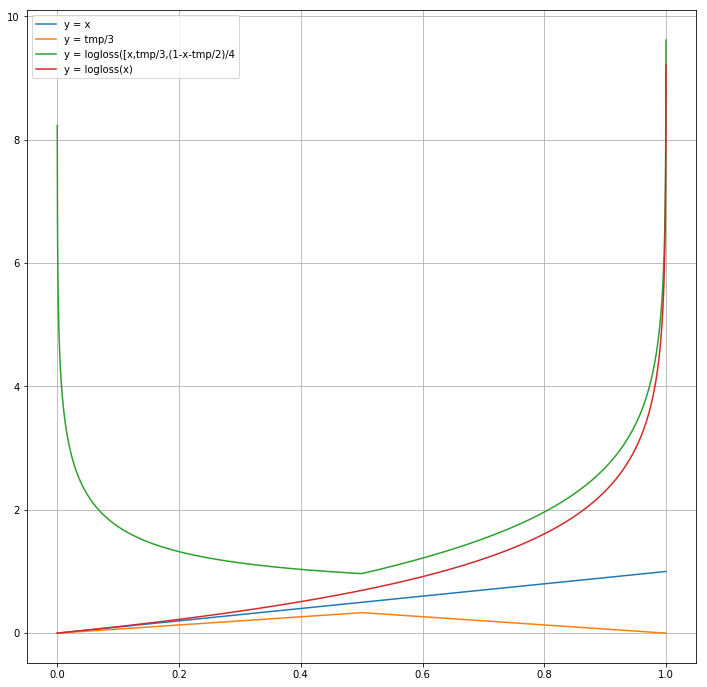

In [120]:
plt.figure(figsize=(12,12))
plt.plot(x, x)
plt.plot(x, [z/3 for z in tmp])
plt.plot(x, ll3)
plt.plot(x, y)
plt.grid(True)
plt.legend(['y = x', 'y = tmp/3', 'y = logloss([x,tmp/3,(1-x-tmp/2)/4',
            'y = logloss(x)'], loc='upper left')

plt.show()

Мда, само че мери релативанта убеденост между класовете, вместо абсолютната. За първата 'мостра', въпреки че увереността за клас 3 е само ~0.25, увереността за другите класове е ~0, което означава, че softmax би дал правилна класификация.

In [126]:
print('predictions:', c3yv2[4999], 'logloss', ll3[4999])

predictions: [0.5, 0.33333333333333331, 0.041666666666666671] logloss 0.965080896044


от първите графики знаем че увереност 0.5 за **True** дава *logloss* ~= 1. 

In [141]:
log_loss([1], [[0.5, 1 -0.3333 -0.0416]], labels=[1, 0])

0.58771556263925961

In [143]:
log_loss([1], [[0.5, 0.5]], labels=[1, 0])

0.69314718055994529

In [146]:
log_loss([1], [[0.5, 0.3333333 + 0.0416666]], labels=[1, 0])

0.84729801276818495

In [148]:
log_loss([1], [[0.5, 0.3333333, 0.0416666]], labels=[1, 0, 3])

0.96508088175787132

In [150]:
log_loss([1], [[0.5, 0.3333333, 0.0416666, 1-sum([0.5, 0.3333333, 0.0416666])]],
         labels=[1, 0, 3, 4])

1.0986123886681147

In [151]:
log_loss([1], [[0.5, 0.5, 0.5]], labels=[1, 0, 3])

1.0986122886681098

Изглежда само увереността за **True** класа и броя на останалите класове определят стойността. Увереността за останалите класове не влияе.

https://github.com/scikit-learn/scikit-learn/issues/4546#issuecomment-168222959

In [129]:
log_loss([1],[[0,1]], labels=[1,0])

9.9920072216264148e-16

In [131]:

def log_loss2(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None):
    """ calculates log loss fixing for unobserved classes
    """
    y_true = np.append(y_true, [-1,1]) # class -1 is 0, class 1 is 1
    y_pred = np.r_['0,2,-1',y_pred, [[1,0],[0,1]]] # p=0 that class is 1 for the first case, p=1 for the second case
    return log_loss(y_true, y_pred, eps, normalize, sample_weight)

log_loss2([1],[[0,1]])

9.9920072216264148e-16